In [1]:
# Angle
%matplotlib inline
import torch
import torchvision
from IPython import display
from torchvision import transforms
from d2l import torch as d2l

def angle(v, w):
    return torch.acos(v.dot(w) / (torch.norm(v) * torch.norm(w)))

print(angle(torch.tensor([0, 1, 2], dtype=torch.float32), torch.tensor([2.0, 3, 4])))

tensor(0.4190)


/home/sann_htet/Desktop/Computer_Science_and_AI/AI/Dive_into_deep_learning/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Hyperplanes
# Load the dataset
trans = []
trans.append(transforms.ToTensor())
trans = transforms.Compose(trans)
train = torchvision.datasets.FashionMNIST(root="/data", transform=trans,
                                          train=True, download=True)
test = torchvision.datasets.FashionMNIST(root="/data", transform=trans,
                                         train=False, download=True)

X_train_0 = torch.stack(
    [x[0] * 256 for x in train if x[1]==0]).type(torch.float32)
X_train_1 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 1]).type(torch.float32)
X_test = torch.stack(
    [x[0] * 256 for x in test if x[1] == 0 or x[1] == 1]).type(torch.float32)
y_test = torch.stack([torch.tensor(x[1]) for x in test
                      if x[1] == 0 or x[1] == 1]).type(torch.float32)

# Compute averages
ave_0 = torch.mean(X_train_0, axis=0)
ave_1 = torch.mean(X_train_1, axis=0)

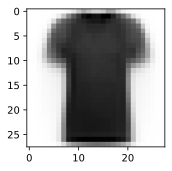

In [24]:
# Plot average t-shirt
d2l.set_figsize()
d2l.plt.imshow(ave_0.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

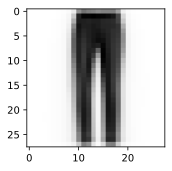

In [25]:
# Plot average trousers
d2l.plt.imshow(ave_1.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

In [26]:
# Print test set accuracy with eyeballed threshold
w = (ave_1 - ave_0).T

/tmp/ipykernel_5061/1617541758.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)
  w = (ave_1 - ave_0).T


In [29]:
# '@' is Matrix Multiplication operator in pytorch.
predictions = X_test.reshape(2000, -1) @ (w.flatten()) > -1500000
# Accuracy
print(torch.mean((predictions.type(y_test.dtype) == y_test).float(), dtype=torch.float64))

tensor(0.7870, dtype=torch.float64)


# Eigenvectors as Long Term Behavior

In [2]:
torch.manual_seed(42)
k = 5
A = torch.randn(k, k, dtype=torch.float64)
A

tensor([[ 0.2996,  0.2424,  0.2832, -0.2329,  0.6712],
        [ 0.7818, -1.7903, -1.7484,  0.1735, -0.1182],
        [-1.7446, -0.4695,  0.4573,  0.5177, -0.2771],
        [-0.6641,  0.6551,  0.2616, -1.5265, -0.3311],
        [-0.6378,  0.1072,  0.7096,  0.3009, -0.2869]], dtype=torch.float64)

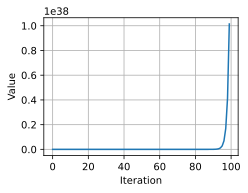

In [9]:
# Calculate the sequence of norms after repeatedly applying `A`
v_in = torch.randn(k, 1, dtype=torch.float64)
norm_list = [torch.norm(v_in).item()]
for i in range(1, 100):
    v_in = A @ v_in
    norm_list.append(torch.norm(v_in).item())
d2l.plot(torch.arange(0, 100), norm_list, 'Iteration', 'Value')

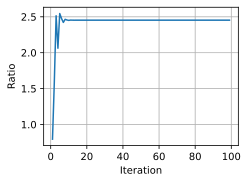

In [10]:
# Compute the scaling factor of the norms
norm_ratio_list = []
for i in range(1, 100):
    norm_ratio_list.append(norm_list[i]/norm_list[i - 1])
d2l.plot(torch.arange(1, 100), norm_ratio_list, 'Iteration', 'Ratio')

In [11]:
# Compute the eigenvalues
eigs = torch.linalg.eig(A).eigenvalues.tolist()
norm_eigs = [torch.abs(torch.tensor(x)) for x in eigs]
norm_eigs.sort()
print(f'norms of eigenvalues: {norm_eigs}')

norms of eigenvalues: [tensor(0.3490), tensor(1.1296), tensor(1.1296), tensor(1.1828), tensor(2.4532)]


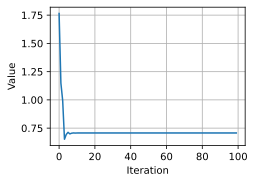

In [ ]:
# Rescale the matrix `A`
A /= norm_eigs[-1]

# Do the same experiment again
v_in = torch.randn(k, 1, dtype=torch.float64)

norm_list = [torch.norm(v_in).item()]
for i in range(1, 100):
    v_in = A @ v_in
    norm_list.append(torch.norm(v_in).item())

d2l.plot(torch.arange(0, 100), norm_list, 'Iteration', 'Value')

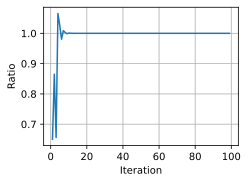

In [15]:
# Also plot the ratio
norm_ratio_list = []
for i in range(1, 100):
    norm_ratio_list.append(norm_list[i]/norm_list[i-1])

d2l.plot(torch.arange(1, 100), norm_ratio_list, 'Iteration', 'Ratio')

# Differential Calculus

/home/sann_htet/Desktop/Computer_Science_and_AI/AI/Dive_into_deep_learning/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


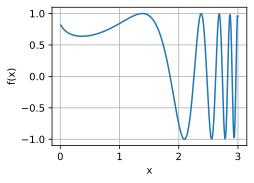

In [2]:
%matplotlib inline
import torch
from IPython import display
from d2l import torch as d2l

torch.pi = torch.acos(torch.zeros(1)).item() * 2 # Define pi in torch

# Plot a function in a normal range
x_big = torch.arange(0.01, 3.01, 0.01)
ys = torch.sin(x_big**x_big)
d2l.plot(x_big, ys, 'x', 'f(x)')

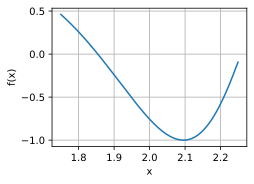

In [3]:
# Plot a the same function in a tiny range
x_med = torch.arange(1.75, 2.25, 0.001)

ys = torch.sin(x_med**x_med)
d2l.plot(x_med, ys, 'x', 'f(x)')

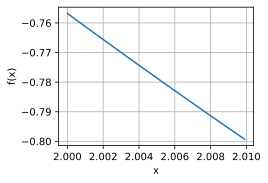

In [4]:
# Plot a the same function in a tiny range
x_small = torch.arange(2.0, 2.01, 0.0001)
ys = torch.sin(x_small**x_small)
d2l.plot(x_small, ys, 'x', 'f(x)')

In [5]:
# Define our function
def L(x):
    return x**2 + 1701*(x-4)**3

# Print the difference divided by epsilon for several epsilon
for epsilon in [0.1, 0.001, 0.0001, 0.00001]:
    print(f'epsilon = {epsilon:.5f} -> {(L(4+epsilon) - L(4)) / epsilon:.5f}')

epsilon = 0.10000 -> 25.11000
epsilon = 0.00100 -> 8.00270
epsilon = 0.00010 -> 8.00012
epsilon = 0.00001 -> 8.00001


## Linear Approximation

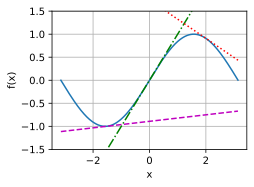

In [16]:
# Compute sin
xs = torch.arange(-torch.pi, torch.pi, 0.01)
plots = [torch.sin(xs)]

for x0 in [-1.5, 0.0, 2.0]:
    plots.append(torch.sin(torch.tensor(x0)) + (xs - x0) *
                 torch.cos(torch.tensor(x0)))
    
d2l.plot(xs, plots, 'x', 'f(x)', ylim=[-1.5, 1.5])

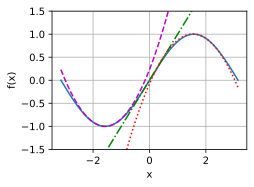

In [17]:
# Compute sin
xs = torch.arange(-torch.pi, torch.pi, 0.01)
plots = [torch.sin(xs)]

# Compute some quadratic approximations. Use d(sin(x)) / dx = cos(x)
for x0 in [-1.5, 0.0, 2.0]:
    plots.append(torch.sin(torch.tensor(x0)) + (xs - x0) *
                 torch.cos(torch.tensor(x0)) - (xs - x0)**2 *
                 torch.sin(torch.tensor(x0)) / 2)

d2l.plot(xs, plots, 'x', 'f(x)', ylim=[-1.5, 1.5])

### Taylor Series

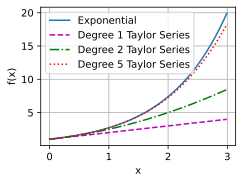

In [18]:
# Compute the exponential function
xs = torch.arange(0, 3, 0.01)
ys = torch.exp(xs)

# Compute a few Taylor series approximations
P1 = 1 + xs
P2 = 1 + xs + xs**2 / 2
P5 = 1 + xs + xs**2 / 2 + xs**3 / 6 + xs**4 / 24 + xs**5 / 120

d2l.plot(xs, [ys, P1, P2, P5], 'x', 'f(x)', legend=[
    "Exponential", "Degree 1 Taylor Series", "Degree 2 Taylor Series", 
    "Degree 5 Taylor Series"])

# Multivariable Calculus

In [4]:
%matplotlib inline
import numpy as np
import torch
from IPython import display
from mpl_toolkits import mplot3d
from d2l import torch as d2l

def f(x, y):
    return torch.log(torch.exp(x) + torch.exp(y))

def grad_f(x, y):
    return torch.tensor([torch.exp(x) / (torch.exp(x) + torch.exp(y)),
                         torch.exp(y) / (torch.exp(x) + torch.exp(y))])

epsilon = torch.tensor([0.01, -0.03])
grad_approx = f(torch.tensor([0.]), torch.log(
    torch.tensor([2.]))) + epsilon.dot(
        grad_f(torch.tensor([0.]), torch.log(torch.tensor(2.))))

true_value = f(torch.tensor([0.]) + epsilon[0], torch.log(
    torch.tensor([2.])) + epsilon[1])
f'approximation: {grad_approx}, true Value: {true_value}'

/home/sann_htet/Desktop/Computer_Science_and_AI/AI/Dive_into_deep_learning/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


'approximation: tensor([1.0819]), true Value: tensor([1.0821])'

## Backpropagation Algorithm

In [1]:
# Compute the value of the function from inputs to outputs
w, x, y, z = -1, 0, -2, 1
a, b = (w + x + y + z)**2, (w + x - y - z)**2
u, v = (a + b)**2, (a - b)**2
f = (u + v)**2
print(f'    f at {w}, {x}, {y}, {z} is {f}')

# Compute the single step partials
df_du, df_dv = 2*(u + v), 2*(u + v)
du_da, du_db, dv_da, dv_db = 2*(a + b), 2*(a + b), 2*(a - b), -2*(a - b)
da_dw, db_dw = 2*(w + x + y + z), 2*(w + x - y - z)

# Compute the final result from inputs to outputs
du_dw, dv_dw = du_da*da_dw + du_db*db_dw, dv_da*da_dw + dv_db*db_dw
df_dw = df_du*du_dw + df_dv*dv_dw
print(f'df/dw at {w}, {x}, {y}, {z} is {df_dw}')

    f at -1, 0, -2, 1 is 1024
df/dw at -1, 0, -2, 1 is -4096


In [2]:
# Compute the value of the function from inputs to outputs
w, x, y, z = -1, 0, -2, 1
a, b = (w + x + y + z)**2, (w + x - y - z)**2
u, v = (a + b)**2, (a - b)**2
f = (u + v)**2
print(f'f at {w}, {x}, {y}, {z} is {f}')

# Compute the derivative using the decomposition above

# First compute the single step partials
df_du, df_dv = 2*(u + v), 2*(u + v)
du_da, du_db, dv_da, dv_db = 2*(a + b), 2*(a + b), 2*(a - b), -2*(a - b)
da_dw, db_dw = 2*(w + x + y + z), 2*(w + x - y - z)
da_dx, db_dx = 2*(w + x + y + z), 2*(w + x - y - z)
da_dy, db_dy = 2*(w + x + y + z), -2*(w + x - y - z)
da_dz, db_dz = 2*(w + x + y + z), -2*(w + x - y - z)

# Now compute how f changes when we change any value from output to input
df_da, df_db = df_du*du_da + df_dv*dv_da, df_du*du_db + df_dv*dv_db
df_dw, df_dx = df_da*da_dw + df_db*db_dw, df_da*da_dx + df_db*db_dx
df_dy, df_dz = df_da*da_dy + df_db*db_dy, df_da*da_dz + df_db*db_dz

print(f'df/dw at {w}, {x}, {y}, {z} is {df_dw}')
print(f'df/dx at {w}, {x}, {y}, {z} is {df_dx}')
print(f'df/dy at {w}, {x}, {y}, {z} is {df_dy}')
print(f'df/dz at {w}, {x}, {y}, {z} is {df_dz}')

f at -1, 0, -2, 1 is 1024
df/dw at -1, 0, -2, 1 is -4096
df/dx at -1, 0, -2, 1 is -4096
df/dy at -1, 0, -2, 1 is -4096
df/dz at -1, 0, -2, 1 is -4096


In [5]:
# Initialize as ndarrays, then attach gradients
w = torch.tensor([-1.], requires_grad=True)
x = torch.tensor([0.], requires_grad=True)
y = torch.tensor([-2.], requires_grad=True)
z = torch.tensor([1.], requires_grad=True)
# Do the computation like usual, tracking gradients
a, b = (w + x + y + z)**2, (w + x - y - z)**2
u, v = (a + b)**2, (a - b)**2
f = (u + v)**2

# Execute backward pass
f.backward()
print(f'df/dw at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {w.grad.data.item()}')
print(f'df/dx at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {x.grad.data.item()}')
print(f'df/dy at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {y.grad.data.item()}')
print(f'df/dz at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {z.grad.data.item()}')

df/dw at -1.0, 0.0, -2.0, 1.0 is -4096.0
df/dx at -1.0, 0.0, -2.0, 1.0 is -4096.0
df/dy at -1.0, 0.0, -2.0, 1.0 is -4096.0
df/dz at -1.0, 0.0, -2.0, 1.0 is -4096.0


### Hessians

/home/sann_htet/Desktop/Computer_Science_and_AI/AI/Dive_into_deep_learning/.venv/lib/python3.12/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


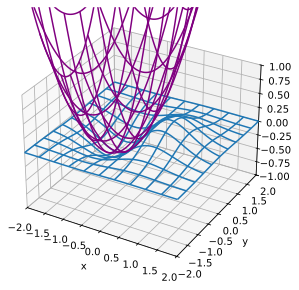

In [6]:
# Construct grid and compute function
x, y = torch.meshgrid(torch.linspace(-2, 2, 101), 
                      torch.linspace(-2, 2, 101))

z = x*torch.exp(- x**2 - y**2)

# Compute approximating quadratic with gradient and Hessian at (1, 0)
w = torch.exp(torch.tensor([-1.]))*(-1 - (x + 1) + 2 * (x + 1)**2 + 2 * y**2)

# Plot function
ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x.numpy(), y.numpy(), z.numpy(), 
                  **{'rstride': 10, 'cstride': 10})
ax.plot_wireframe(x.numpy(), y.numpy(), w.numpy(), 
                  **{'rstride': 10, 'cstride': 10}, color='purple')

d2l.plt.xlabel('x')
d2l.plt.ylabel('y')
d2l.set_figsize()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-1, 1)
ax.dist = 12

# Integral Calculus

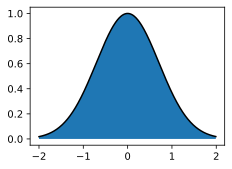

In [2]:
%matplotlib inline
import torch
from IPython import display
from mpl_toolkits import mplot3d
from d2l import torch as d2l

x = torch.arange(-2, 2, 0.01)
f = torch.exp(-x**2)

d2l.set_figsize()
d2l.plt.plot(x, f, color='black')
d2l.plt.fill_between(x.tolist(), f.tolist())
d2l.plt.show()

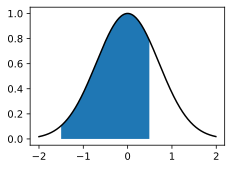

In [3]:
x = torch.arange(-2, 2, 0.01)
f = torch.exp(-x**2)

d2l.set_figsize()
d2l.plt.plot(x, f, color='black')
d2l.plt.fill_between(x.tolist()[50:250], f.tolist()[50:250])
d2l.plt.show()

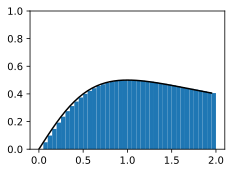

'approximation: 0.7944855690002441, truth: tensor([0.8047])'

In [9]:
epsilon = 0.05
a = 0
b = 2

x = torch.arange(a, b, epsilon)
f = x / (1 + x**2)

approx = torch.sum(epsilon*f)
true = torch.log(torch.tensor([5.])) / 2

d2l.set_figsize()
d2l.plt.bar(x, f, width=epsilon, align='edge')
d2l.plt.plot(x, f, color='black')
d2l.plt.ylim([0, 1])
d2l.plt.show()
f'approximation: {approx}, truth: {true}'